In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, r2_score, roc_auc_score, roc_curve, cohen_kappa_score, brier_score_loss
from sklearn.metrics import matthews_corrcoef

In [2]:
data = pd.read_csv("dat_15-09-2022_morgan_chiral_2048FP.csv")
#data

In [3]:
df = pd.DataFrame(data)
df.reset_index(drop=True, inplace=True)
df

,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,FP10,...,FP2040,FP2041,FP2042,FP2043,FP2044,FP2045,FP2046,FP2047,FP2048,Target
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
y= df.Target
X=df.drop('Target', axis=1)

In [5]:
cat_features=list(range(0,X.shape[1]))
#print(cat_features)

In [6]:
y_train = df.Target
x_train = df.drop('Target', axis=1)

In [7]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T

In [8]:
y_train.value_counts()

0    1109
1    1102
Name: Target, dtype: int64

In [9]:
#Read the validation set
v_test_data = pd.read_csv("val_15-09-2022_morgan_chiral_2048FP.csv")
v_test_data = pd.DataFrame(v_test_data)
v_test_data.shape

(367, 2049)

In [10]:
Y_v_test_data = v_test_data.Target
X_v_test_data = v_test_data.drop('Target', axis=1)

In [431]:
# Normalize
#X_v_test_data = (X_v_test_data - np.min(X_v_test_data)) / (np.max(X_v_test_data) - np.min(X_v_test_data)).values
#X_v_test_data.shape

In [11]:
Y_v_test_data = v_test_data.Target
X_v_test_data =v_test_data.drop('Target', axis=1)

In [70]:
weights = {0:0.5, 1:0.5}

In [71]:
#### For1024
#svm = SVC(C=1,kernel='rbf',probability=True,gamma=0.001, class_weight=weights)
#For2048, gamma=0.0001
svm = SVC(C=8,kernel='rbf',probability=True,gamma=0.001, class_weight=weights) #classic performance1
#svm = SVC(C=8,kernel='rbf',probability=True,gamma=0.912, class_weight=weights)
#Things are improving
#svm = SVC(C=10,kernel='rbf',probability=True,gamma=0.05, class_weight=weights) 
#svm = SVC(C=10,kernel='rbf',probability=True,gamma=0.0110, class_weight=weights) # classific performance3


#For mol_desc
#svm = SVC(C=25,kernel='rbf',probability=True,gamma=0.0001, class_weight=weights)
#svm = SVC(kernel='rbf',probability=True)
svm.fit(x_train.T, y_train.T)  #.T

SVC(C=8, class_weight={0: 0.5, 1: 0.5}, gamma=0.001, probability=True)

In [72]:
v_predictions = svm.predict(X_v_test_data)
acc_train=svm.score(x_train.T,y_train.T)*100
v_acc_test=svm.score(X_v_test_data, Y_v_test_data)*100
print(acc_train)
print(v_acc_test)

80.4161013116237
65.39509536784742


In [73]:
from sklearn.metrics import matthews_corrcoef
print('Accuracy:%0.3f'% v_acc_test)
tn, fp, fn, tp = confusion_matrix(Y_v_test_data, v_predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Sensitivity:%0.3f'% sensitivity)
print('Specificity:%0.3f'% specificity)
ba = 0.5 * (sensitivity + specificity)
print('Balance accuracy:%0.3f'% ba)
mcc = matthews_corrcoef(Y_v_test_data, v_predictions)
#mcc = matthews_corrcoef(Y_test_data, v_predictions)
print('MCC: %0.3f'% mcc)
r_auc_score = roc_auc_score(Y_v_test_data, v_predictions)
#r_auc_score = roc_auc_score(Y_test_data, v_predictions)
print('AUC: %0.3f' % r_auc_score)
bloss = brier_score_loss(Y_v_test_data, v_predictions)
#bloss = brier_score_loss(Y_test_data, v_predictions)
print('Brier_loss: %0.3f' % bloss)
FPR = fp/(fp+tn)
FNR = fn/(tp+fn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('False Postive rate: %0.3f' %FPR)
print('False Negative rate: %0.3f' %FNR)
print('Precision: %0.3f' %Precision)
print('Recall: %0.3f' %Recall)
f1=2*((Precision*Recall)/(Precision+Recall))
print('F1: %0.3f' %f1)
kappa = cohen_kappa_score(Y_v_test_data, v_predictions)
print('Kappa: %0.3f' %kappa)

Accuracy:65.395
Sensitivity:0.504
Specificity:0.726
Balance accuracy:0.615
MCC: 0.226
AUC: 0.615
Brier_loss: 0.346
False Postive rate: 0.274
False Negative rate: 0.496
Precision: 0.469
Recall: 0.504
F1: 0.486
Kappa: 0.226


In [74]:
cf =(confusion_matrix(Y_v_test_data, v_predictions))
print(classification_report(Y_v_test_data, v_predictions))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       248
           1       0.47      0.50      0.49       119

    accuracy                           0.65       367
   macro avg       0.61      0.62      0.61       367
weighted avg       0.66      0.65      0.66       367



<AxesSubplot:xlabel='Predicted Value', ylabel='True Value'>

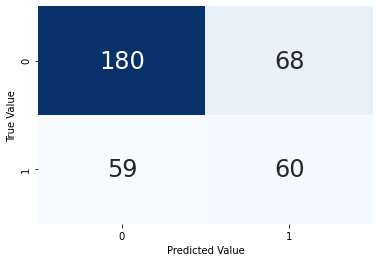

In [75]:
cf_plt =sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "Predicted Value", ylabel ="True Value")
cf_plt

In [76]:
r_probs = [0 for _ in range(len(Y_v_test_data))]
svm_prob = svm.predict_proba(X_v_test_data)
svm_prob = svm_prob[:,1]
svm_prob_val=pd.DataFrame(svm_prob)

In [77]:
svm_prob_val.to_csv('SVM_2048_Valitation_Prediction.csv')

In [44]:
r_probs = [0 for _ in range(len(Y_v_test_data))]
svm_prob = svm.predict_proba(X_v_test_data)
svm_prob = svm_prob[:,1]

In [78]:
prediction_val=svm.predict(X_v_test_data)
prediction_val

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [418]:
prediction_val=pd.DataFrame(prediction_val)

In [419]:
prediction_val.to_csv("label_val_1024_SVM.csv")

In [79]:
r_auc_score = roc_auc_score(Y_v_test_data, svm_prob)
r_auc_score_1 = roc_auc_score(Y_v_test_data,r_probs)
print(r_auc_score)
fpr, tpr, _ = roc_curve(Y_v_test_data, svm_prob)
rfpr, rtpr, _ = roc_curve(Y_v_test_data, r_probs)

0.684264028191922


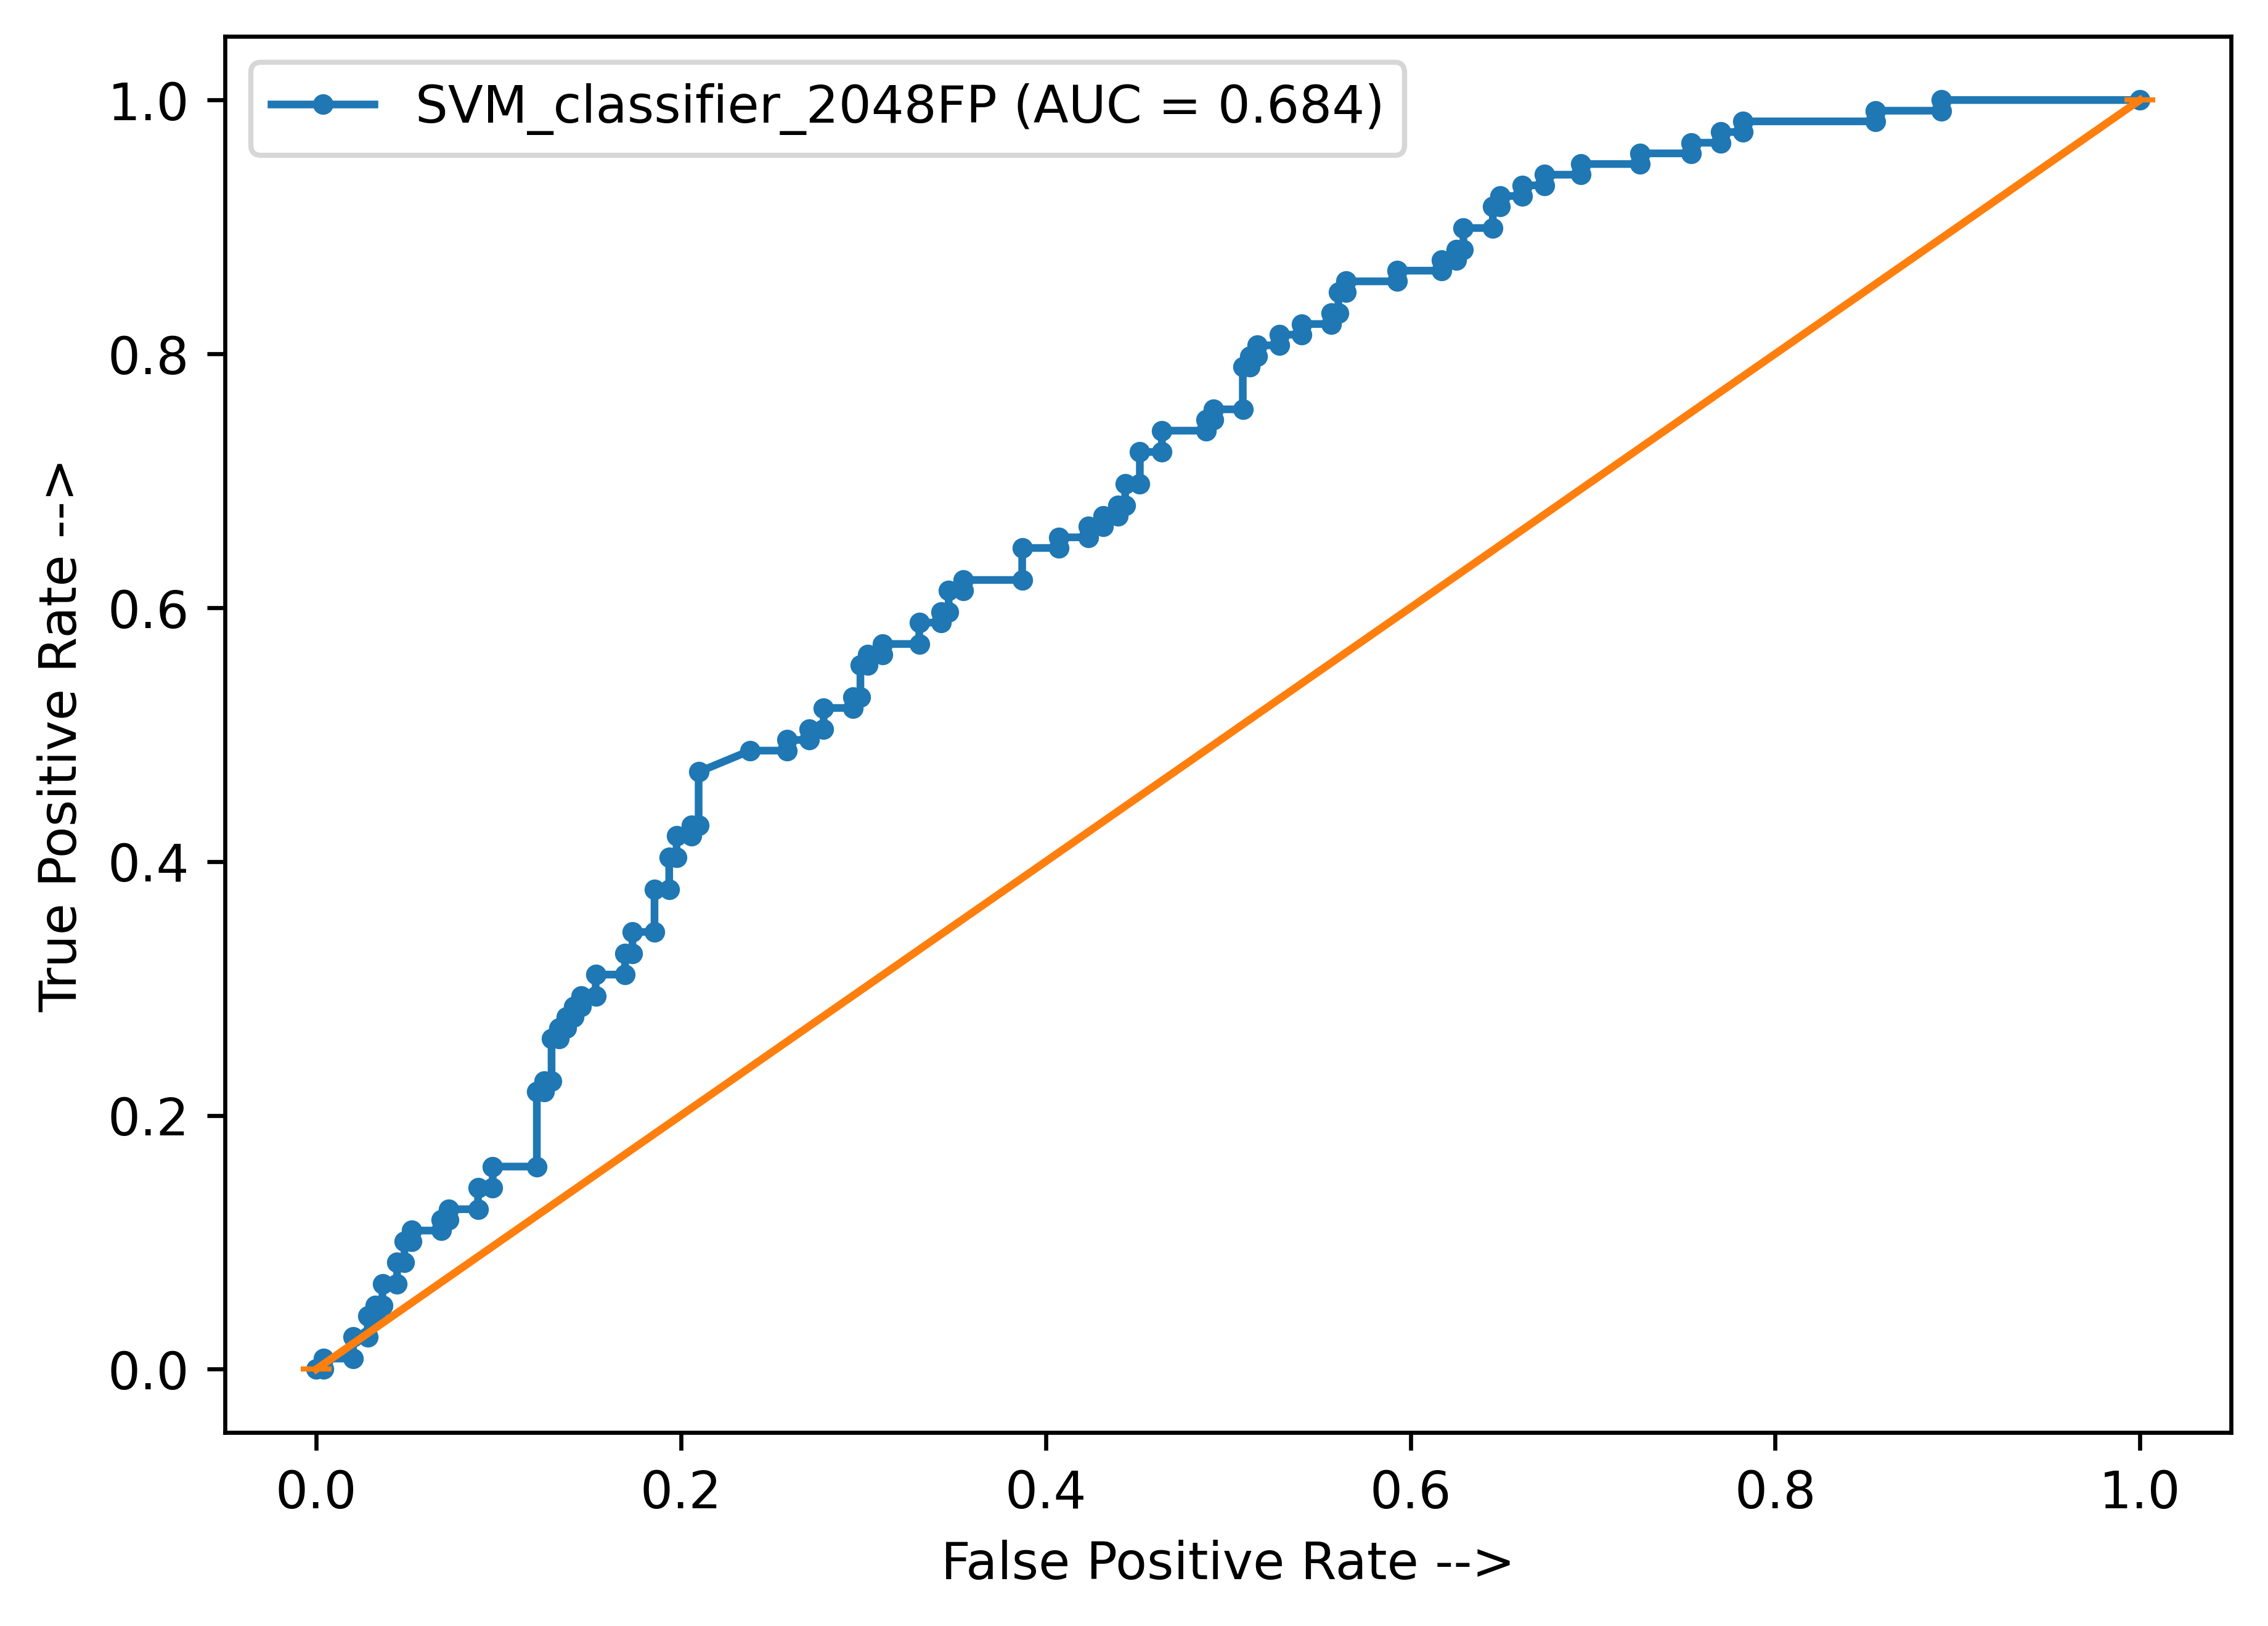

In [80]:
plt.figure(figsize=(7, 5), dpi=600)
plt.plot(fpr, tpr, marker='.', label='SVM_classifier_2048FP (AUC = %0.3f)' % r_auc_score)
plt.plot(rfpr, rtpr, marker='_' % r_auc_score_1)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()
#plt.savefig('SVM_AUC.png', dpi=600, bbox_inches='tight')

In [ ]:
#plt.figure(figsize=(10,6))
#plt.title("Predictions of RBF kernel with C=1 and Gamma=0.01", fontsize=18)
#plt.scatter(X_v_test_data.iloc[:, 0], X_v_test_data.iloc[:, 1], c=v_predictions, s=50, cmap='cool')
#plt(svm)

In [81]:
from sklearn.metrics import RocCurveDisplay

In [82]:
from scipy import interp
from sklearn.metrics import roc_curve,auc
cv = StratifiedKFold(n_splits=10,shuffle=False)

<ipython-input-83-ae071a5c44ab>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-83-ae071a5c44ab>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-83-ae071a5c44ab>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-83-ae071a5c44ab>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-83-ae071a5c44ab>:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-83-ae071a5c44ab>:13: DeprecationWarning: scipy.interp i

<Figure size 4200x3000 with 0 Axes>

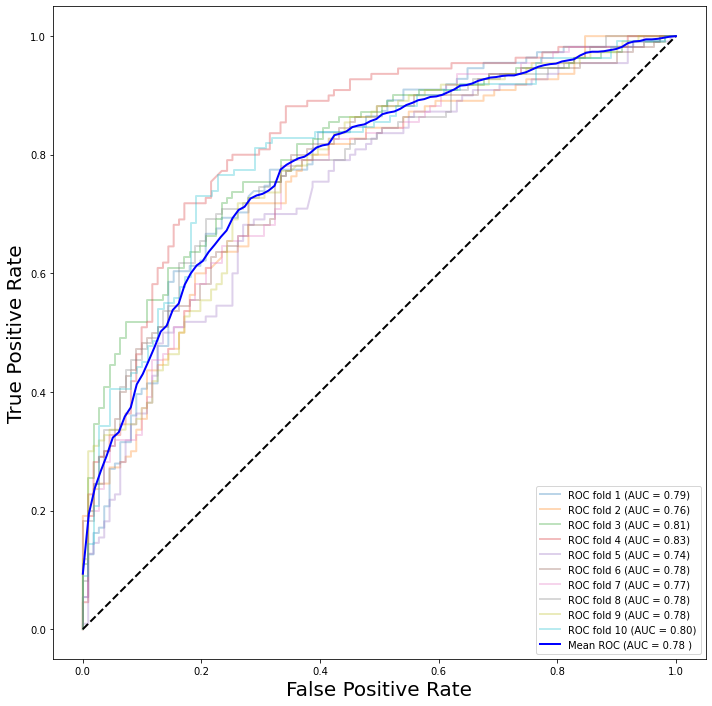

In [83]:
# plot k fold ROC
plt.figure(figsize=(7, 5), dpi=600)
x_train = x_train.T
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_train,y_train):
    prediction = svm.fit(x_train.iloc[train],y_train.iloc[train]).predict_proba(x_train.iloc[test])
    fpr, tpr, t = roc_curve(y_train.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.legend(loc="lower right")
plt.show()
#plt.savefig('CrossVal-AUC_CB_1024.png', dpi=600, bbox_inches='tight')

In [84]:
#Read external set
external_data = pd.read_csv("cyclic_ind_16-09-2022_morgan_chiral_2048FP.csv")
data_for_screening = pd.DataFrame(external_data)
#data_for_screening

In [85]:
#test external data
test_prob = svm.predict_proba(data_for_screening)
test_prob_F = pd.DataFrame(test_prob)
test_prob_F.to_csv('SVM_2048FP_External_probability.csv')

In [87]:
prediction_ext=svm.predict(data_for_screening)
prediction_ext=pd.DataFrame(prediction_ext)
prediction_ext.to_csv("SVM_2048_External_Prediction.csv")

In [ ]:
##Y-randomization

In [88]:
accuracy_list = []
mcc_list = []
for i in range(50):
    y_train = y_train.sample(frac=1, replace=False, random_state=i)
    svm.fit(x_train, y_train)
    print('Trained')
    scrmb_predictions = svm.predict(X_v_test_data)
    print(i)
    accuracy = roc_auc_score(Y_v_test_data, scrmb_predictions)
    print('scra_pred')
    accuracy_list.append(accuracy)
    mcc_v = matthews_corrcoef(Y_v_test_data, scrmb_predictions)
    mcc_list.append(mcc_v)
print(accuracy_list)

Trained
0
scra_pred
Trained
1
scra_pred
Trained
2
scra_pred
Trained
3
scra_pred
Trained
4
scra_pred
Trained
5
scra_pred
Trained
6
scra_pred
Trained
7
scra_pred
Trained
8
scra_pred
Trained
9
scra_pred
Trained
10
scra_pred
Trained
11
scra_pred
Trained
12
scra_pred
Trained
13
scra_pred
Trained
14
scra_pred
Trained
15
scra_pred
Trained
16
scra_pred
Trained
17
scra_pred
Trained
18
scra_pred
Trained
19
scra_pred
Trained
20
scra_pred
Trained
21
scra_pred
Trained
22
scra_pred
Trained
23
scra_pred
Trained
24
scra_pred
Trained
25
scra_pred
Trained
26
scra_pred
Trained
27
scra_pred
Trained
28
scra_pred
Trained
29
scra_pred
Trained
30
scra_pred
Trained
31
scra_pred
Trained
32
scra_pred
Trained
33
scra_pred
Trained
34
scra_pred
Trained
35
scra_pred
Trained
36
scra_pred
Trained
37
scra_pred
Trained
38
scra_pred
Trained
39
scra_pred
Trained
40
scra_pred
Trained
41
scra_pred
Trained
42
scra_pred
Trained
43
scra_pred
Trained
44
scra_pred
Trained
45
scra_pred
Trained
46
scra_pred
Trained
47
scra_pred
Tr

In [2]:
accuracy_list = [0.539085795608566, 0.5605855245323936, 0.5925216860937924, 0.4656410951477365, 0.48864868528056377, 0.4814143399295202, 0.4720113851992409, 0.4977297370561128, 0.550674301978856, 0.47470520466251015, 0.4565431011114124, 0.49401938194632694, 0.4541881268636486, 0.4397533206831119, 0.5123509081051776, 0.5431180536730822, 0.48947885605855246, 0.5352060178910273, 0.4612530496069396, 0.5229398210897261, 0.5015925725128761, 0.5360531309297913, 0.4630997560314448, 0.4147126592572513, 0.5347146923285444, 0.45151124966115475, 0.5805773922472215, 0.48209203036053133, 0.5103347790729195, 0.5123509081051776, 0.46511588506370294, 0.5163831661696936, 0.47907630794253186, 0.577070344266739, 0.4800928435890485, 0.4980685822716183, 0.5284799403632421, 0.5049640824071564, 0.4540356465166712, 0.49386690159934943, 0.4048014367037137, 0.4276565464895636, 0.5022702629438872, 0.5115037950664137, 0.48293914339929517, 0.5288187855787476, 0.3755421523448089, 0.4679621848739496, 0.47385809162374626, 0.5214319598807264]
def Average(lst):
    return sum(lst) / len(lst)
#print(mcc_list)
average = Average(accuracy_list)
  
# Printing average of the list
print("Average of the accuracy list =", round(average, 3))

Average of the accuracy list = 0.494


In [ ]:
def Average(lst):
    return sum(lst) / len(lst)
#print(mcc_list)
average = Average(mcc_list)
  
# Printing average of the list
print("Average of the mcc list =", round(average, 3))

/home/acdsd/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 1.0)]

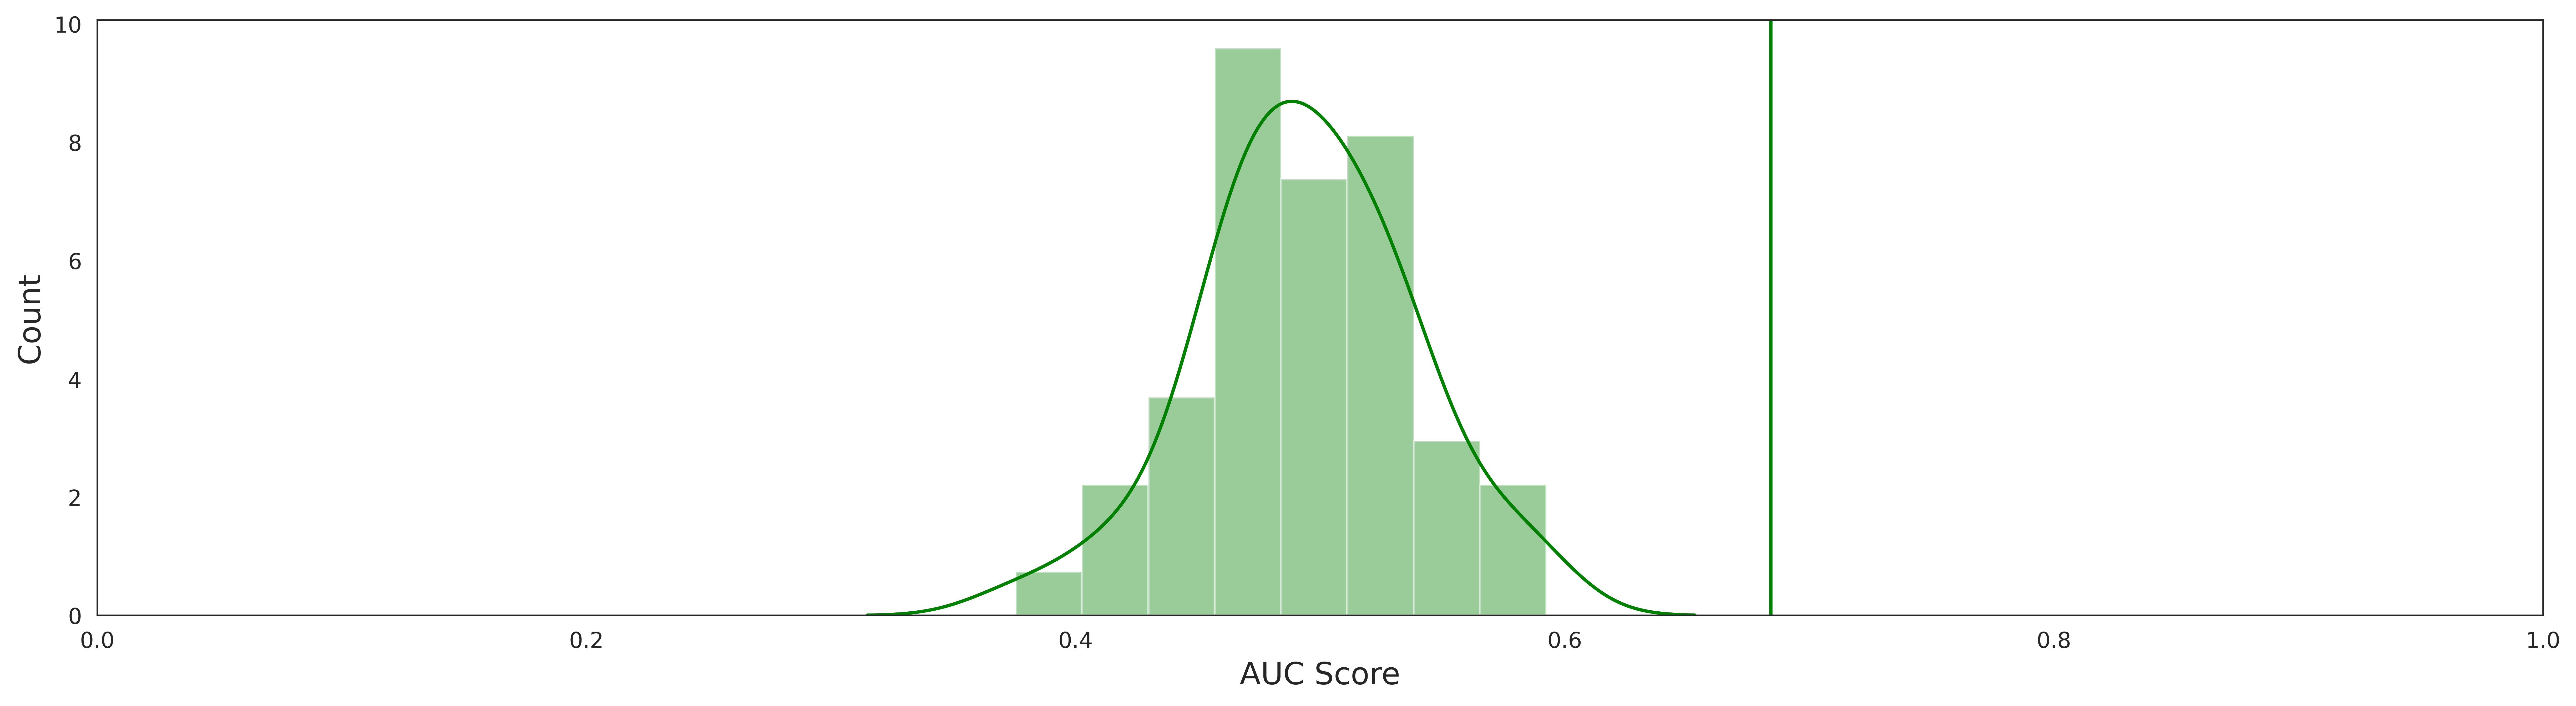

In [89]:
r_auc_score2 = roc_auc_score(Y_v_test_data, scrmb_predictions)
sns.set_style("white")
plt.figure(figsize = (20, 5), dpi=600) 
ax = sns.distplot(accuracy_list, color="green")
plt.axvline(r_auc_score, color="green")
plt.xlabel("AUC Score", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
ax.set(xlim=(0, 1))
#plt.savefig('CatBoost_scrambling_plot.png', dpi=600, bbox_inches='tight')

/home/acdsd/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 1.0)]

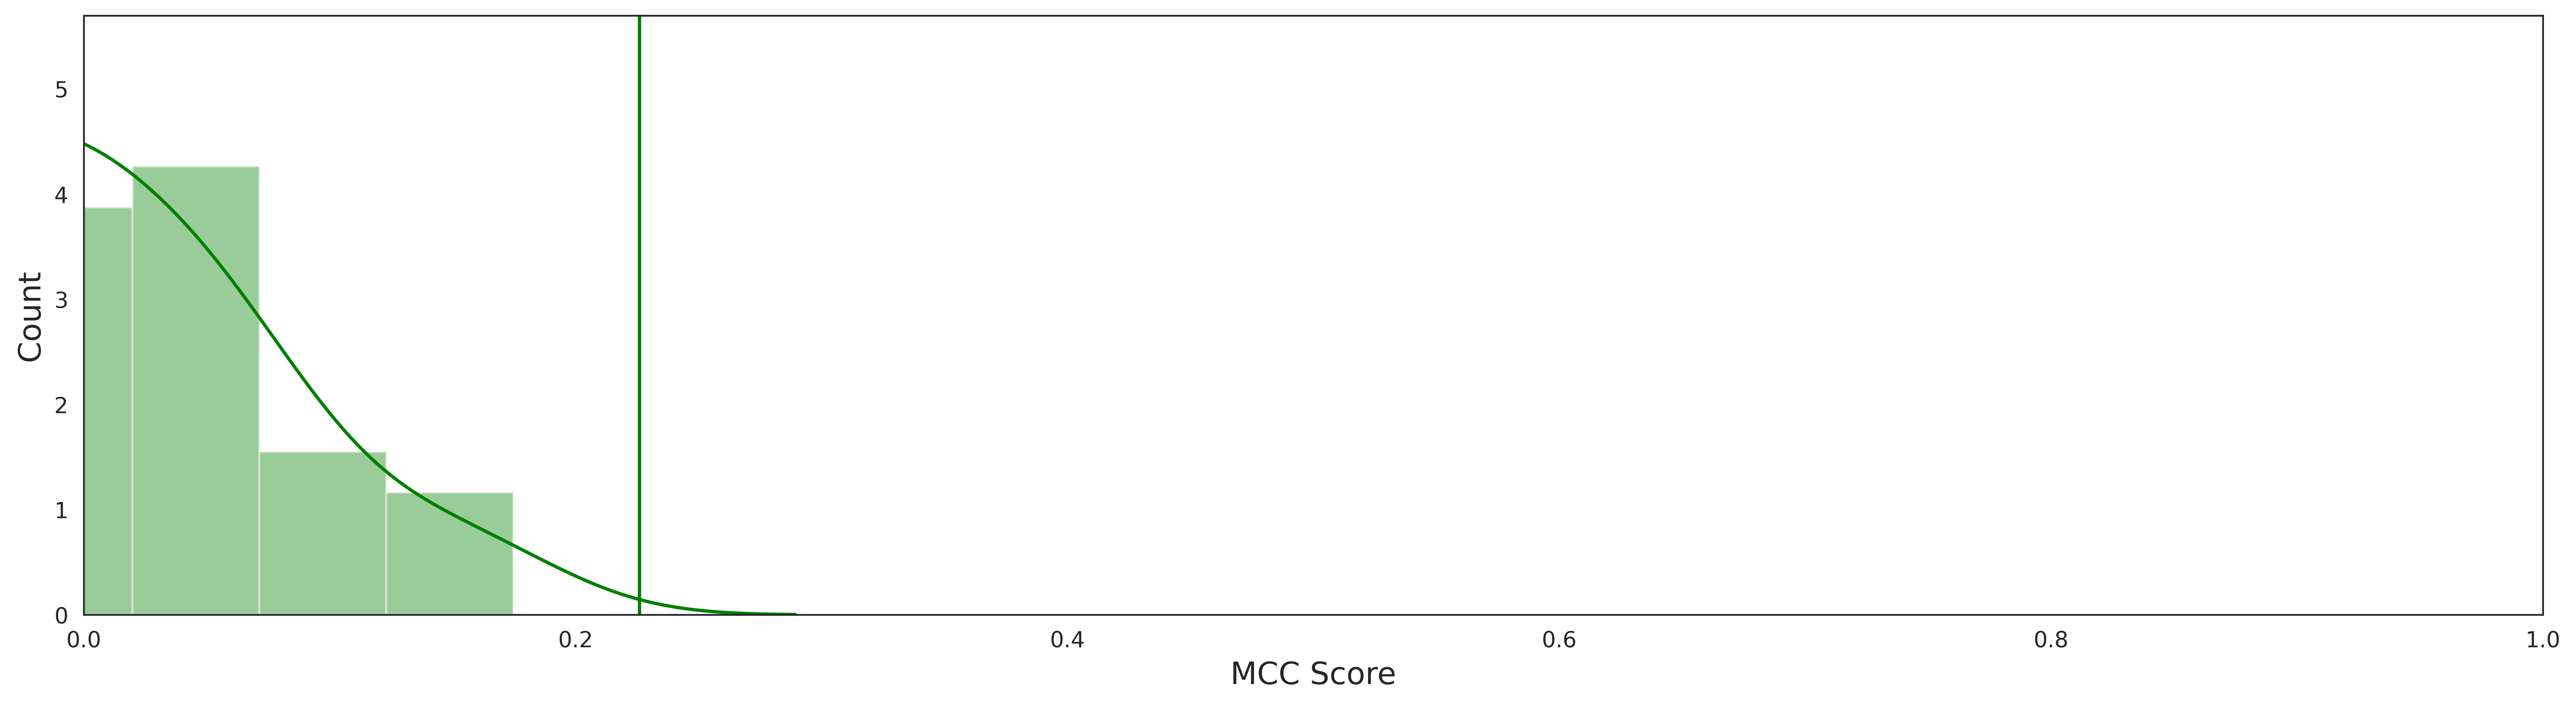

In [90]:
mcc2 = matthews_corrcoef(Y_v_test_data, scrmb_predictions)
sns.set_style("white")
plt.figure(figsize = (20, 5), dpi=600) 
ax = sns.distplot(mcc_list, color="green")
plt.axvline(mcc, color="green")
plt.xlabel("MCC Score", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
ax.set(xlim=(0, 1))
#plt.savefig('CB_MCC_plot.png', dpi=600, bbox_inches='tight')

In [ ]:
external_data = pd.read_csv("IND_07-09-2022_morgan_chiral_1024FP.csv")
data_for_screening = pd.DataFrame(external_data)

In [ ]:
test_prob = svm.predict_proba(data_for_screening)
test_prob_F = pd.DataFrame(test_prob)
test_prob_F.to_csv('SVM1024_probability_FP.csv')